# Human Activities - Classification

Pour ce TP nous allons mettre en pratique plusieurs méthodes de classification supervisée sur des données d'enregistrement d'acceleromètres (de smart-phones).

Les données sources sont disponibles sur [ici](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/Data/UCI-HAR-Dataset.zip), voir aussi la description sur le site de [la plateforme de données UCI](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

"The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details."

L'objectif de ce TP est de retrouver l'activité à partir de toutes ces descripteurs (features). Notez que dans un contexte plus réaliste il vous faudrait créer par vosu même tous ces features qui décrivent les séries temporelles des accelerations enregistrées.


In [1]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing 

# Importation des données


Les commandes suivantes permettent de récupérer les données.
Pour simplifier on n'utilise pour le TP que les données du dossier "train".

> Vérifiez que vous comprenez l'ensemble des commandes ci-dessous.

In [2]:
votre_path= "/mnt/e/centrale nantes/ai/a2/stasc/tp/tp4/uci-har-dataset/"

#### Importation des features

In [3]:
data_path = votre_path + "train/X_train.txt"
activity_features = pd.read_csv(data_path,delim_whitespace=True,
                                header=None)

#### Importation des activités :

In [4]:
data_path = votre_path + "train/y_train.txt"
activity  =    pd.read_csv(data_path,delim_whitespace=True,header=None)

activity  =  activity.values[:,0] -  1 
# la première activité sera 0 (plus pratique en python)
activity_names = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
# activity label = 0 1 2 3 4 5 and these are the values of activity

La variable à prédire  est la variable d'activité. Il s'agit donc d'un problème de classification (à 6 classes).
Pour cela on dispose des variables du tableau `activity_features`. 
> Combien de variables sont disponibles pour construire le prédicteur de l'activité ?  De combien d'observations dispose-t-on ?

In [5]:
print(activity_features)

           0         1         2         3         4         5         6    \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.299665 -0.057193 -0.181233 -0.195387  0.039905  0.077078 -0.282301   
7348  0.273853 -0.007749 -0.147468 -0.235309  0.004816  0.059280 -0.322552   
7349  0.273387 -0.017011 -0.045022 -0.218218 -0.103822  0.274533 -0.304515   
7350  0.289654 -0.018843 -0.158281 -0.219139 -0.111412  0.268893 -0.310487   
7351  0.351503 -0.012423 -0.203867 -0.269270 -0.087212  0.177404 -0.377404   

           7         8         9    ...       551       552    

Pour beaucoup de méthodes d'appprentissage statistique, il est conseiller de préalablement standardiser les données.

> Effectuer une standardisation des features (activity_features) avec la fonction  [scale()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) de scikit-learn.

In [6]:
# données standardisées
features_nor = preprocessing.scale(activity_features, axis=0, with_mean=True, with_std=True, copy=True)   


#### Importation des sujets :

In [7]:
data_path = votre_path + "train/subject_train.txt"
sujet =  pd.read_csv(data_path,delim_whitespace=True,header=None)
sujet =sujet.values[:,0]

A chaque sujet correspond plusieurs observations.
> Indiquer le nombre d'observations de chaque sujet

In [8]:
import numpy as np

# 假设 sujet 是一个 NumPy 数组，其中包含主题标识符
unique_subjects, observation_counts = np.unique(sujet, return_counts=True)

# 创建一个包含每个主题及其对应的观测数量的新数组
subjects_and_counts = np.column_stack((unique_subjects, observation_counts))

# 打印每个主题的观测数量
# print(subjects_and_counts)

observations_per_subject = []
for i in range(len(sujet)):
    count = 1
    if sujet[i] == sujet[i-1] and i > 0:
        continue
    for j in range(1, len(sujet)):
        if sujet[i] == sujet[j]:
            count += 1
    observations_per_subject.append([sujet[i], count])

print(observations_per_subject)



[[1, 347], [3, 342], [5, 303], [6, 326], [7, 309], [8, 282], [11, 317], [14, 324], [15, 329], [16, 367], [17, 369], [19, 361], [21, 409], [22, 322], [23, 373], [25, 410], [26, 393], [27, 377], [28, 383], [29, 345], [30, 384]]


# Problème de classification à deux classes

Dans toute la première partie du TP, on considère un problème de classification à deux classes. 

> Extraire les donnnés pour les activités  'WALKING_DOWNSTAIRS' (activity = 3)  et 'SITTING' (activity =4) uniquement. On appele `features34` et `activity34` les données correspondantes.

In [9]:
# n: rows
# p: colomns
n,p = shape(features_nor)

index_act34 = [i for i in range(n) if activity[i] == 3 or activity[i] == 4 ] 

activity34 = [activity[i] for i in index_act34]
features34 = [features_nor[i] for i in index_act34]
print(shape(features34))

(2660, 561)


# Présélection de features  pour réduire la dimension (screening)

Pour diminuer les temps de calul on peut pré-sélectionner les 100 features les plus discriminants via un critère univarié. 

> Utiliser le critère  [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) basé sur la F-value (variance inter / variance intra).

Attention, cette méthode ne garantit en rien que l'on choisisse ainsi le "meilleur" groupe de 100 variables pour le problème de classification.

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
Selec = SelectKBest(score_func=f_classif, k=10)
features34 = Selec.fit_transform(features34, activity34)
print(shape(features34))

(2660, 10)


# Ajustement et prédiction pour des méthodes classiques de classification 

> Pour chacune des méthodes de classificiation listées ci-dessous, ajuster un predicteur de l'activité en utilisant comme données d'apprentissage la base (features34,activity34) :      
- Classifieur naif bayesien avec la fonction `GaussianNB()`   
- Classifieur des k plus proches voisins avec `neighbors.KNeighborsClassifier()` avec 5 plus proches voisins.  
- Classifieur par régression logistique avec pénalisation ridge, en utilisant la fonction `linear_model.LogisticRegression() `. Indiquer la pénalité "l2" dans les arguments de la fonction et choisir le solveur "saga" (voir la doc de la fonction).


Une présentation de chacune des ces fonctions est disponible sur cette [page](http://scikit-learn.org/stable/user_guide.html).
</p>

In [11]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(features34, activity34)


from sklearn import neighbors
neighbor_plus_proche = 5
nn = neighbors.KNeighborsClassifier(neighbor_plus_proche)
nn.fit(features34, activity34)


from sklearn import linear_model
logit =  linear_model.LogisticRegression()
logit.fit(features34, activity34)


LogisticRegression()

Pour chacune de ces méthodes, on peut faire une prédiction grâce à la méthode `predict()`. par exemple pour le classifieur naif bayesien : 

In [12]:
feat_pred_gnb = gnb.predict(features34)
print(feat_pred_gnb)


[4 4 4 ... 3 3 3]


> Faire de même une prédiction pour le classifieur des plus proches voisins et pour la régression logistique. 

In [13]:
feat_pred_nn = nn.predict(features34)
print(feat_pred_nn)

feat_pred_logit = logit.predict(features34)
print(feat_pred_logit)

[4 4 4 ... 3 3 3]
[4 4 4 ... 3 3 3]


> Ces prédictions sont-elles cohérentes entre elles ?

In [14]:
# None. Ells ne sont pas absolument même.

> Pour chaque prédicteur :
> - Calculer le taux d'erreur "à la main" en comparant les observations et les prédictions.
> - Calculer le taux de bon classement avec la méthode `score()` (disponible pour tout predicteur)

In [15]:
from sklearn.metrics import accuracy_score
# GaussianNB
Gau_score = accuracy_score(activity34, feat_pred_gnb)
# neighbors
Nei_score = accuracy_score(activity34, feat_pred_nn)
# logic
Log_score = accuracy_score(activity34, feat_pred_logit)

Evidemment ce n'est pas pas la bonne façon d'estimer le risque de l'estimateur : estimer de l'erreur de généralisation en évaluant les erreurs sur l'échantillon qui a déjà servi à ajuster le prédicteur conduit la plupart du temps à une estimation trop optimiste.

# Evaluation de l'erreur par découpage train / test

Nous allons maintenant évaluer l'erreur de généralisation en conservant une partie de l'échantillon pour évaluer les erreurs du prédicteur ajusté. Pour cela on découpe aléatoirement l'échantillon initial en deux parties :  

- l'ensemble d'apprentissage : utilisé pour ajuster les prédicteurs ;
- l'ensemble de test : utilisé pour évaluer les performances des prédicteurs.

> Utiliser la fonction <code>train_test_split</code> du module [<code>model_selection</code>](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) pour construire un échantillon d'apprentissage de taille 60% (et donc 40% réservées aux données de test)

In [16]:
from sklearn import model_selection

features_train, features_test, activity_train, activity_test = model_selection.train_test_split(features34, activity34, test_size=0.4, random_state=42)
print(len(activity_train)/ float(len(activity34)))
print(len(activity_test)/ float(len(activity34)))
print(shape(features_test))

0.6
0.4
(1064, 10)


> Evaluer le risque d'un classifieur par plus proches voisins (knn) avec 5 voisins sur ce découpage des données : ajuster sur les données d'apprentissage et évaluer les erreurs sur le test.  
>
> Vérifier que l'estimation de l'erreur ainsi obtenue est plus élevée que l'estimation obtenue précédemment, en ajustant et évaluant l'erreur sur le même échantillon (échantillon complet, sans découpage)

In [17]:
# neighbors
nn_train = neighbors.KNeighborsClassifier(neighbor_plus_proche)
nn_train.fit(features_train, activity_train)
nn_train_pred = nn_train.predict(features_test)
nn_train_score = accuracy_score(activity_test, nn_train_pred)
print(nn_train_score)


0.9013157894736842


> Reproduire la procédure 100 fois et dresser le boxplot de l'estimation de l'erreur sur ces 100 runs.

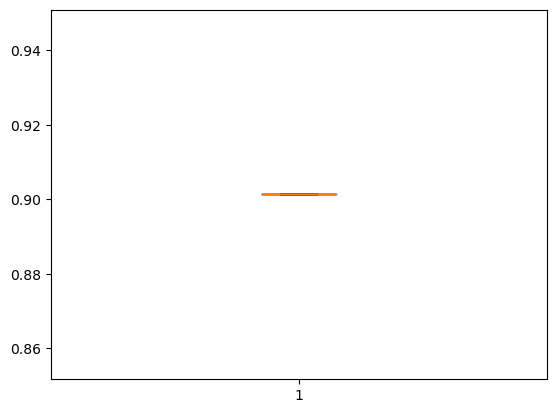

In [18]:
score_train_test = [] # pour stockage des scores
for simu in range(100) :
    features_train, features_test, activity_train, activity_test = model_selection.train_test_split(features34, activity34, test_size=0.4, random_state=42)
    nn_train_test = neighbors.KNeighborsClassifier(neighbor_plus_proche)
    nn_train_test.fit(features_train, activity_train)
    score_train_test.append(accuracy_score(activity_test, nn_train_test.predict(features_test)))
B = plt.boxplot(score_train_test)

> Tracer la courbe d'erreur du classifieur par plus proches voisins en fonction du nombre de voisins utilisés (de 1 à 15), en utilisant cette méthode de découpage train / test répétée 20 fois.

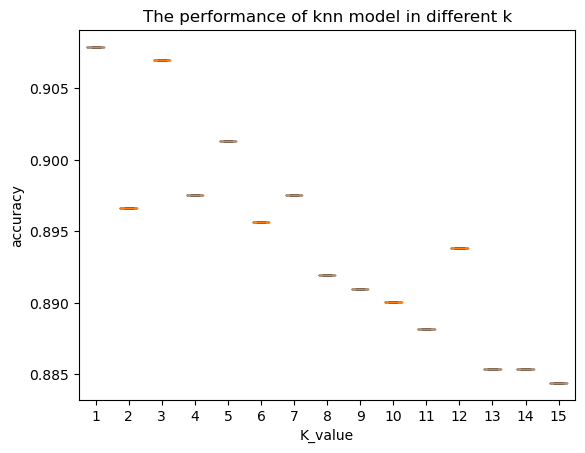

In [19]:
score = []
k_values = list(range(1, 16))
for k in range(1, 16):
    score_train_test = [] # pour stockage des scores
    for simu in range(20) :
        features_train, features_test, activity_train, activity_test = model_selection.train_test_split(features34, activity34, test_size=0.4, random_state=42)
        nn_train_test = neighbors.KNeighborsClassifier(k)
        nn_train_test.fit(features_train, activity_train)
        score_train_test.append(accuracy_score(activity_test, nn_train_test.predict(features_test)))
    score.append(score_train_test)

B = plt.boxplot(score, labels = k_values)
plt.xlabel('K_value')
plt.ylabel('accuracy')
plt.title('The performance of knn model in different k')
plt.show()

En réalité, si l'on désire une estimation du modèle sélectionné ainsi, il faut découper l'échantillon disponible non pas en deux mais en trois parties :
- l'ensemble d'apprentissage : utilisé pour construire des modèles ;
- l'ensemble de validation : utilisé pour choisir un modèle ;
- l'ensemble de test : utilisé pour évaluer les performances du modèle
  finalement choisi.
  
Ceci est notamment important lorsque l'on souhaite comparer deux méthodes qui ont toutes les deux fait intervenir un réglage de paramètres (ici le nombre de voisins).

> **Question bonus** (finir le tp avant de répondre à cette question) : Mettre en oeuvre cette méthode pour estimer l'erreur de généralisation du prédicteur knn pour lequel le nombre de voisins est choisi via l'échantillon de validation.

# Estimation du risque par validation croisée 

On présente ci-dessous la méthode du de validation croisée de type **k-fold**.

L'idée principale est de faire jouer à chaque observation à la fois le rôle de donnée d'apprentissage et celui de donnée de validation. 

Le principe consiste à partitionner aléatoirement les données $D=(\mathbf{x}_i,y_i)_{1\leq i\leq N} $ 
en $K$ blocs disjoints de tailles comparables :
$D^1,\ldots,D^K$. On prend généralement $K=5$ ou $10$. La méthode du **leave-one-out (Loo)** correspond au choix $K=N$. 

On estime alors la qualité d'un predicteur $\hat f$ de la
façon suivante :
- pour tout $k \in \{1,\dots, K\}$, on construit un predicteur $\hat f^k$ (du même type que $\hat f$) sur l'ensemble d'apprentissage $D^{-k} := D\setminus D^k$ ;
- on estime le risque du prédicteur $\hat f$ par   
$$
\frac{1}{N}\sum_{k=1}^K\sum_{\mathbf{x}_i\in D^k} \ell(\hat f^k(\mathbf{x}_i),y_i),
$$
où $\ell$ est la perte utilisée.

On construit donc autant de prédicteurs qu'il y a de blocs dans
l'ensemble d'apprentissage. Chaque prédicteur est évalué sur les éléments du
bloc qui n'a pas été utilisé pour l'apprentissage (et qui joue donc le rôle d'
ensemble de validation). 

Lorsque l'on souhaite régler un paramètre en utilisant la validation croisée, par exemple le nombre de voisins $k$ pour knn, on procède comme suit :
- on évalue les performances des prédicteurs par validation croisée comme expliqué ci-dessus ;
- on détermine la valeur optimale du paramètre ;
- on construit finalement un predicteur pour le paramètre sélectionné, en utilisant comme base d'apprentissage toutes les données.


**Comparaison entre LOO et methodes k folds, quelques repères :** 
- LOO a un coût computationnel plus élevé que les méthodes k-fold pour k petit (pour k = 5 ou 10 par exemple)
- L'estimation de l'erreur fournie par LOO a généralement une variance plus élevée que celles obtenues par un k-fold pour k petit.
- En revanche, si l'erreur de classification décroit très rapidement avec $n$, les méthodes k-fold avec k petit peuvent surestimer significativement l'erreur de généralisation.
- En général, il est souvent recommandé d'utiliser les méthodes k-fold avec k = 5 ou 10.

L'ensemble des méthodes de validation croisée disponibles sous `sklearn` sont disponibles dans le module [<code>model_selection</code>](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection). Voir aussi le [guide](https://scikit-learn.org/stable/modules/cross_validation.html#).

##  Estimation de l'erreur par 10-fold :

In [20]:
nn_val_croisee = neighbors.KNeighborsClassifier(n_neighbors = 10)
scores = model_selection.cross_val_score(nn_val_croisee, features34, activity34, cv=10)
print(scores)
print(mean(scores))

[0.95488722 0.82330827 0.88345865 0.79323308 0.90601504 0.87593985
 0.87969925 0.94736842 0.87593985 0.80075188]
0.8740601503759399


Attention cependant, avec cette méthode, la fonction `cross_val_score` ne permute pas préalablement les données avant de définir les blocs. Voir cette [note](https://scikit-learn.org/stable/modules/cross_validation.html#a-note-on-shuffling) dans la doc de sklearn.

> Modifier la procédure pour que les données soient bien initiallement permutées. On utilise pour cela un "iterateur" de validation croisée, que l'on définit ici avec la fonction `KFold`, et que l'on fournit en argument de la fonction `cross_val_score`.

In [21]:
my_kfold = model_selection.KFold(n_splits = 10)

nn_val_croisee = neighbors.KNeighborsClassifier(n_neighbors = 10)

scores = model_selection.cross_val_score(estimator=nn_val_croisee,
                        X=features34,
                        y=activity34,
                        cv=my_kfold,
                        n_jobs=-1) # permet de répartir les calculs sur plusieurs coeurs

##  Estimation de l'erreur par Loo


> Utiliser la fonction <code>LeaveOneOut</code> de `model_selection` pour évaluer l'erreur du classifieur de plus proches voisin (pour 10 voisins).



In [28]:
# creer un objet de leaveOneOut
loo = model_selection.LeaveOneOut()
# X, Y
X = features34
Y = activity34
scores_knn = []
# creer knn
knn = neighbors.KNeighborsClassifier(10)
# validation croisee en utilisant LeaveOneOut
for train_indices, test_index in loo.split(X):
    X_train, X_test = [X[i] for i in train_indices], X[test_index[0]]
    Y_train, Y_test = [Y[i] for i in train_indices], [Y[test_index[0]]]
    knn.fit(X_train, Y_train)
    X_test = X_test.reshape(1, -1)  # 将 X_test 转换为 2D 数组
    score_knn = accuracy_score(Y_test, knn.predict(X_test))
    scores_knn.append(score_knn)

# average
average_score = sum(scores_knn) / len(scores_knn)
print(f"The score average is:{average_score}")

The score average is:0.906390977443609


> La question de la permutation aléatoire initiale des données se pose-t-elle ici aussi ?

In [29]:
"""
Ce problème est souvent lié à la segmentation des données et à la stochasticité 
dans la formation de modèles en apprentissage automatique.

Lors de la validation croisée et de la formation de modèles, 
cela implique souvent un partitionnement aléatoire ou des permutations aléatoires des données. 
En effet, si l'ensemble de données lui-même a un certain ordre, 
cela peut conduire à l'introduction de biais lors de la division de l'ensemble de données 
ou de la formation du modèle. Pour réduire ce biais, une disposition aléatoire 
ou un partitionnement aléatoire des données peuvent être utilisés.

Dans l'apprentissage automatique, les données sont souvent mélangées 
ou disposées de manière aléatoire pour garantir une distribution aléatoire des données. 
Ceci peut être réalisé grâce à des fonctions aléatoires dans les bibliothèques 
ou à des méthodes de fractionnement des données.

Cette question signifie donc, dans le contexte actuel, 
si la disposition aléatoire initiale des données doit être prise en compte 
et si elle a un impact sur la formation du modèle et l'évaluation des performances. 
Dans certains cas, il peut être important de garantir le caractère aléatoire de la distribution des données 
afin de réduire les biais.
"""

"\nCe problème est souvent lié à la segmentation des données et à la stochasticité \ndans la formation de modèles en apprentissage automatique.\n\nLors de la validation croisée et de la formation de modèles, \ncela implique souvent un partitionnement aléatoire ou des permutations aléatoires des données. \nEn effet, si l'ensemble de données lui-même a un certain ordre, \ncela peut conduire à l'introduction de biais lors de la division de l'ensemble de données \nou de la formation du modèle. Pour réduire ce biais, une disposition aléatoire \nou un partitionnement aléatoire des données peuvent être utilisés.\n\nDans l'apprentissage automatique, les données sont souvent mélangées \nou disposées de manière aléatoire pour garantir une distribution aléatoire des données. \nCeci peut être réalisé grâce à des fonctions aléatoires dans les bibliothèques \nou à des méthodes de fractionnement des données.\n\nCette question signifie donc, dans le contexte actuel, \nsi la disposition aléatoire initi

## Sélection du nombre de plus proches voisins par validation croisée 10 fold

> Selectionner un nombre de voisins pour le classifieur de plus proches voisins par validation croisée 10 fold.

In [30]:
my_kfold = model_selection.KFold(n_splits = 10)

nn_val_croisee = neighbors.KNeighborsClassifier(n_neighbors = 10)

scores = model_selection.cross_val_score(estimator=nn_val_croisee,
                        X=features34,
                        y=activity34,
                        cv=my_kfold,
                        n_jobs=-1) # permet de répartir les calculs sur plusieurs coeurs

## La fonction GridSearchCV

En apprentissage statistique, on a très souvent recours à la validation croisée pour régler des paramètres de la méthode utilisée. La fonction [gridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) permet d'effectuer cette tâche de façon simple, en répartissant éventuellement les calculs sur plusieurs coeurs (voir plus bas).

In [31]:
from sklearn.model_selection import GridSearchCV
from time import time

# la grille de parametres a regler sont definis dans un dictionnaire (dict)
tuned_parameters = {'n_neighbors': range(2,20)}
start = time()

my_kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
nnGrid = GridSearchCV(neighbors.KNeighborsClassifier(),
                      tuned_parameters,
                      cv=5)
nnGrid.fit(features34, activity34)
print(str(time() - start)+ " sec")

# le meilleur modele 
print(nnGrid.best_params_)

2.0273025035858154 sec
{'n_neighbors': 10}


> Si votre machine le permet, utiliser maintenant plusieurs coeurs (argument "n_jobs= ") et comparer les temps de calcul.

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time

# la grille de parametres a regler sont definis dans un dictionnaire (dict)
tuned_parameters = {'n_neighbors': range(2,20)}
start = time()

my_kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
nnGrid = GridSearchCV(neighbors.KNeighborsClassifier(),
                      tuned_parameters,
                      cv=5,
                      n_jobs = 2)
nnGrid.fit(features34, activity34)
print(str(time() - start)+ " sec")

# le meilleur modele 
print(nnGrid.best_params_)

# Classification multiclasses 

Pour réduire les temps de calcul (il s'agit d'un TP...) nous appliquons la même stratégie de présélection de features que nous avons utilisé pour la classification binaire.

## Présélection de features

Pour réduire les temps de calcul (il s'agit d'un TP...) nous appliquons la même stratégie de présélection de features que pour le cas à deux classes :

In [33]:
Selec = SelectKBest(f_classif, k=100)
features_all_activities = Selec.fit_transform(activity_features, activity)
shape(features_all_activities)

(7352, 100)

#### Classifieur naif bayesien multiclasses

In [34]:
gnb = GaussianNB()
scores  = model_selection.cross_val_score(gnb, features_all_activities, activity, cv=my_kfold)
print(scores)
print(mean(scores))

[0.77581522 0.78668478 0.78367347 0.76054422 0.75646259 0.79319728
 0.76598639 0.80680272 0.79319728 0.76326531]
0.778562925170068


#### Classifieur des k plus proches voisins multiclasses

In [35]:
nn = neighbors.KNeighborsClassifier(n_neighbors = 10)
scores  = model_selection.cross_val_score(nn, features_all_activities, activity, cv=my_kfold)
print(scores)
print(mean(scores))

[0.94293478 0.95380435 0.95918367 0.9414966  0.9414966  0.94421769
 0.94285714 0.94421769 0.93877551 0.94421769]
0.9453201715468795


> Effectuer un découpage apprentissage / test des données (avec toutes les classes).
> Utiliser la fonction `GridSearchCV` sur l'échantillon d'apprentissage pour choisir le nombre de voisins pour l'estimateur knn. Dresser et afficher la matrice de confusion sur les données de test, voir [ici](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) et [ici](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Divisez les données en ensembles d'apprentissage et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Créez un classificateur k-NN
knn = KNeighborsClassifier()

# Définissez la grille des hyperparamètres (nombre de voisins) à explorer
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Utilisez GridSearchCV pour trouver le meilleur nombre de voisins
grid_search = GridSearchCV(knn, param_grid, cv=5)  # Vous pouvez spécifier le nombre de plis (cv) pour la validation croisée
grid_search.fit(X_train, Y_train)

# Obtenez le meilleur estimateur
best_knn = grid_search.best_estimator_

# Dressez la matrice de confusion
confusion = confusion_matrix(Y_test, best_knn.predict(X_test))

# Affichez la matrice de confusion
print("Matrice de confusion :")
print(confusion)

# # Vous pouvez également afficher la matrice de confusion graphiquement
# plot_confusion_matrix(best_knn, X_test, Y_test)


Matrice de confusion :
[[236  22]
 [ 25 249]]
